In [1]:
#importing basic and neccessary libraries
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import itertools

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12,7]

In [2]:
#helper function to extract co authors from the list of papers
def get_authors(filename):
    coauthors = []
    e = ET.parse(filename)
    for author in e.getroot().iter("contrib"):
        if 'author' in author.attrib.values():
            namenode = author.find("name")
            if namenode is not None:
                try:
                    surname = namenode.find("surname").text
                except AttributeError:
                    continue  # skip authors with no surname
                try:
                    givenname = namenode.find("given-names").text
                except AttributeError:
                    givenname = "Unknown"  # ignore missing first names
                fullname = "%s %s" % (givenname, surname)
                coauthors.append(fullname.encode('utf-8').decode('utf-8'))
    return coauthors

In [3]:
#accessing each file in the directory. the tesst folder contains 24 out of 47 files from Acad_med folder(for the purpose of clarity)
import os
path = os.getcwd()+'\\tesst'
coauthors = []

for filename in os.listdir(path):
    if not filename.endswith('.nxml'): continue
    fullname = os.path.join(path, filename)
    coauthors.append(get_authors(fullname))

In [4]:
#creating flat list out of list of lists
flat_list=[]
for sublist in coauthors:
    for item in sublist:
        flat_list.append(item)

In [5]:
#total length of list
x = len(flat_list)

In [6]:
#dividing into 3 parts for 3 communities
y = x//4

In [7]:
import networkx as nx

In [8]:
#creating empty graph
G = nx.Graph()

In [9]:
#nodes
V = flat_list

In [10]:
#communities
C = ["com1", "com2","com3","com4"]

In [11]:
#members of each community
M = {
    "com1": set(flat_list[:y]),
    "com2": set(flat_list[y:2*y]),
    "com3": set(flat_list[2*y:3*y]),
    "com4": set(flat_list[3*y:])
}

In [12]:
#probability of each community
pc = {"com1": 0.4, "com2": 0.5, "com3": 0.6,"com4": 0.5}

In [13]:
#creating graph with nodes and computing edges between each pair of nodes
def B(V, C, M, pc, e=0.01):
    G = nx.Graph()
    for name in V:
        G.add_node(name)

    # check every pair of nodes
    for u,v in itertools.combinations(G.nodes, 2):
        
        # compute formula part inside big Product
        p_part = 1
        for community in C:
            if u in M[community] and v in M[community]:
                p_part *= 1 - pc[community]
                
        # compute full formula
        P_uv = 1 - p_part
        
        # if u and v share no communities, there is still small chance of random edge
        if P_uv == 0:
            P_uv = e
        
        # add edge with random probability given by the formula
        if np.random.rand() < P_uv:
            G.add_edge(u, v)

    return G

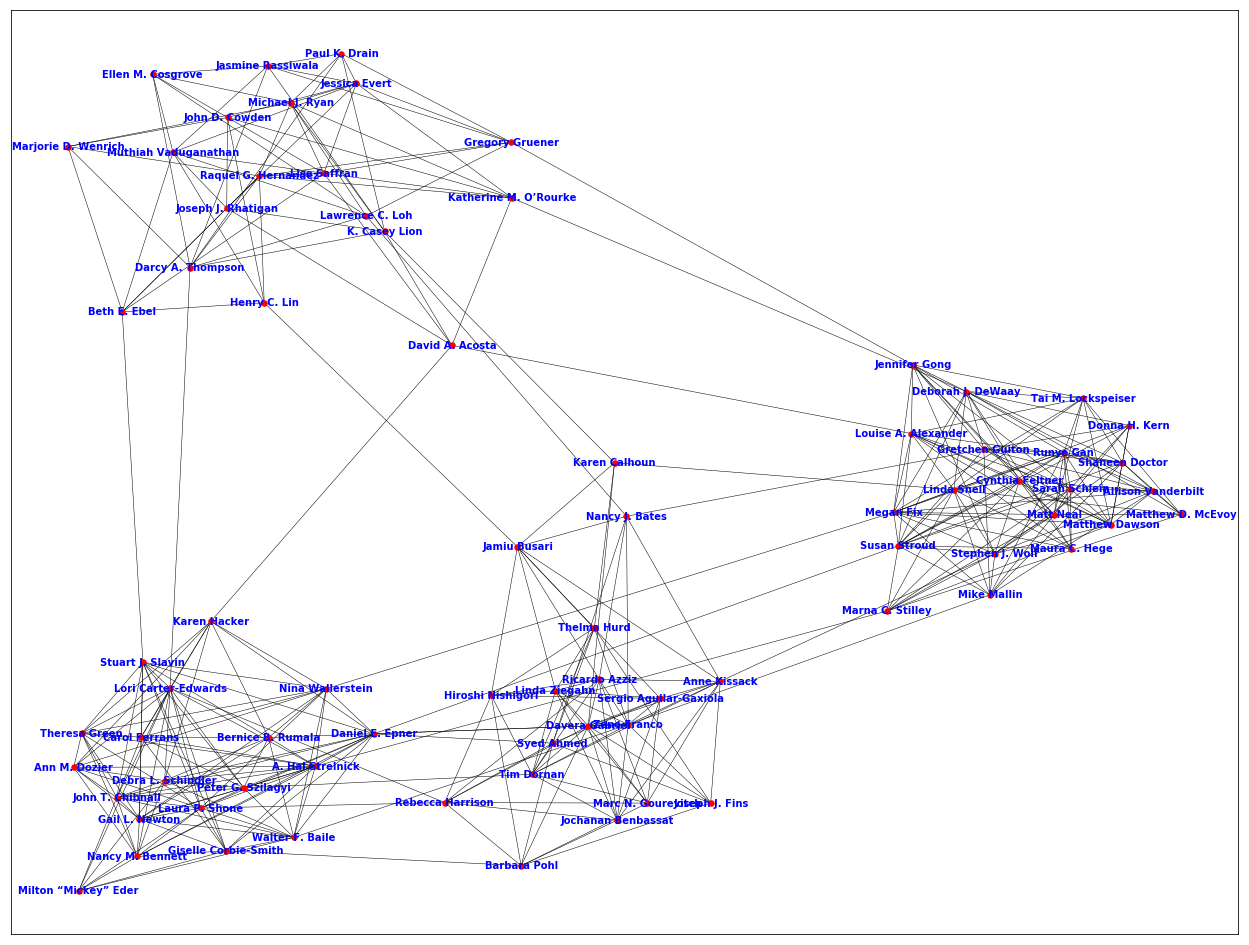

In [14]:
#printing graph
matplotlib.rcParams['figure.figsize'] = [22,17]
G_new = B(V, C, M, pc, e=0.01)


nx.draw_networkx(G_new, 
                 node_size=30, width=0.5,
                 font_color='b', font_weight='bold', font_size=10)

plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
plt.show()

In [15]:
#!pip install --upgrade networkx

In [16]:
#importing community and finding communities by modularity
from networkx.algorithms import community

In [17]:
from networkx.algorithms.community import greedy_modularity_communities

In [18]:
comm = greedy_modularity_communities(G_new)
comm

[frozenset({'Allison Vanderbilt',
            'Cynthia Feltner',
            'Deborah J. DeWaay',
            'Donna H. Kern',
            'Gretchen Guiton',
            'Jennifer Gong',
            'Linda Snell',
            'Louise A. Alexander',
            'Marna C. Stilley',
            'Matt Neal',
            'Matthew D. McEvoy',
            'Matthew Dawson',
            'Maura C. Hege',
            'Megan Fix',
            'Mike Mallin',
            'Runye Gan',
            'Sarah Schlein',
            'Shaneen Doctor',
            'Stephen J. Wolf',
            'Susan Stroud',
            'Tai M. Lockspeiser'}),
 frozenset({'Beth E. Ebel',
            'Darcy A. Thompson',
            'David A. Acosta',
            'Ellen M. Cosgrove',
            'Gregory Gruener',
            'Henry C. Lin',
            'Jasmine Rassiwala',
            'Jessica Evert',
            'John D. Cowden',
            'Joseph J. Rhatigan',
            'K. Casey Lion',
            'Karen Calhoun',
   

In [19]:
#creating flat list out of list of lists
flat_list1=[]
for sublist in comm:
    for item in sublist:
        flat_list1.append(item)

In [20]:
#nodes
V1 = flat_list1

In [21]:
#communities
C1 = ["com1", "com2","com3","com4"]

In [22]:
#members of community
M1 = {
    'com1':set(comm[0]),
    'com2':set(comm[1]),
    'com3':set(comm[2]),
    'com4':set(comm[3])
}

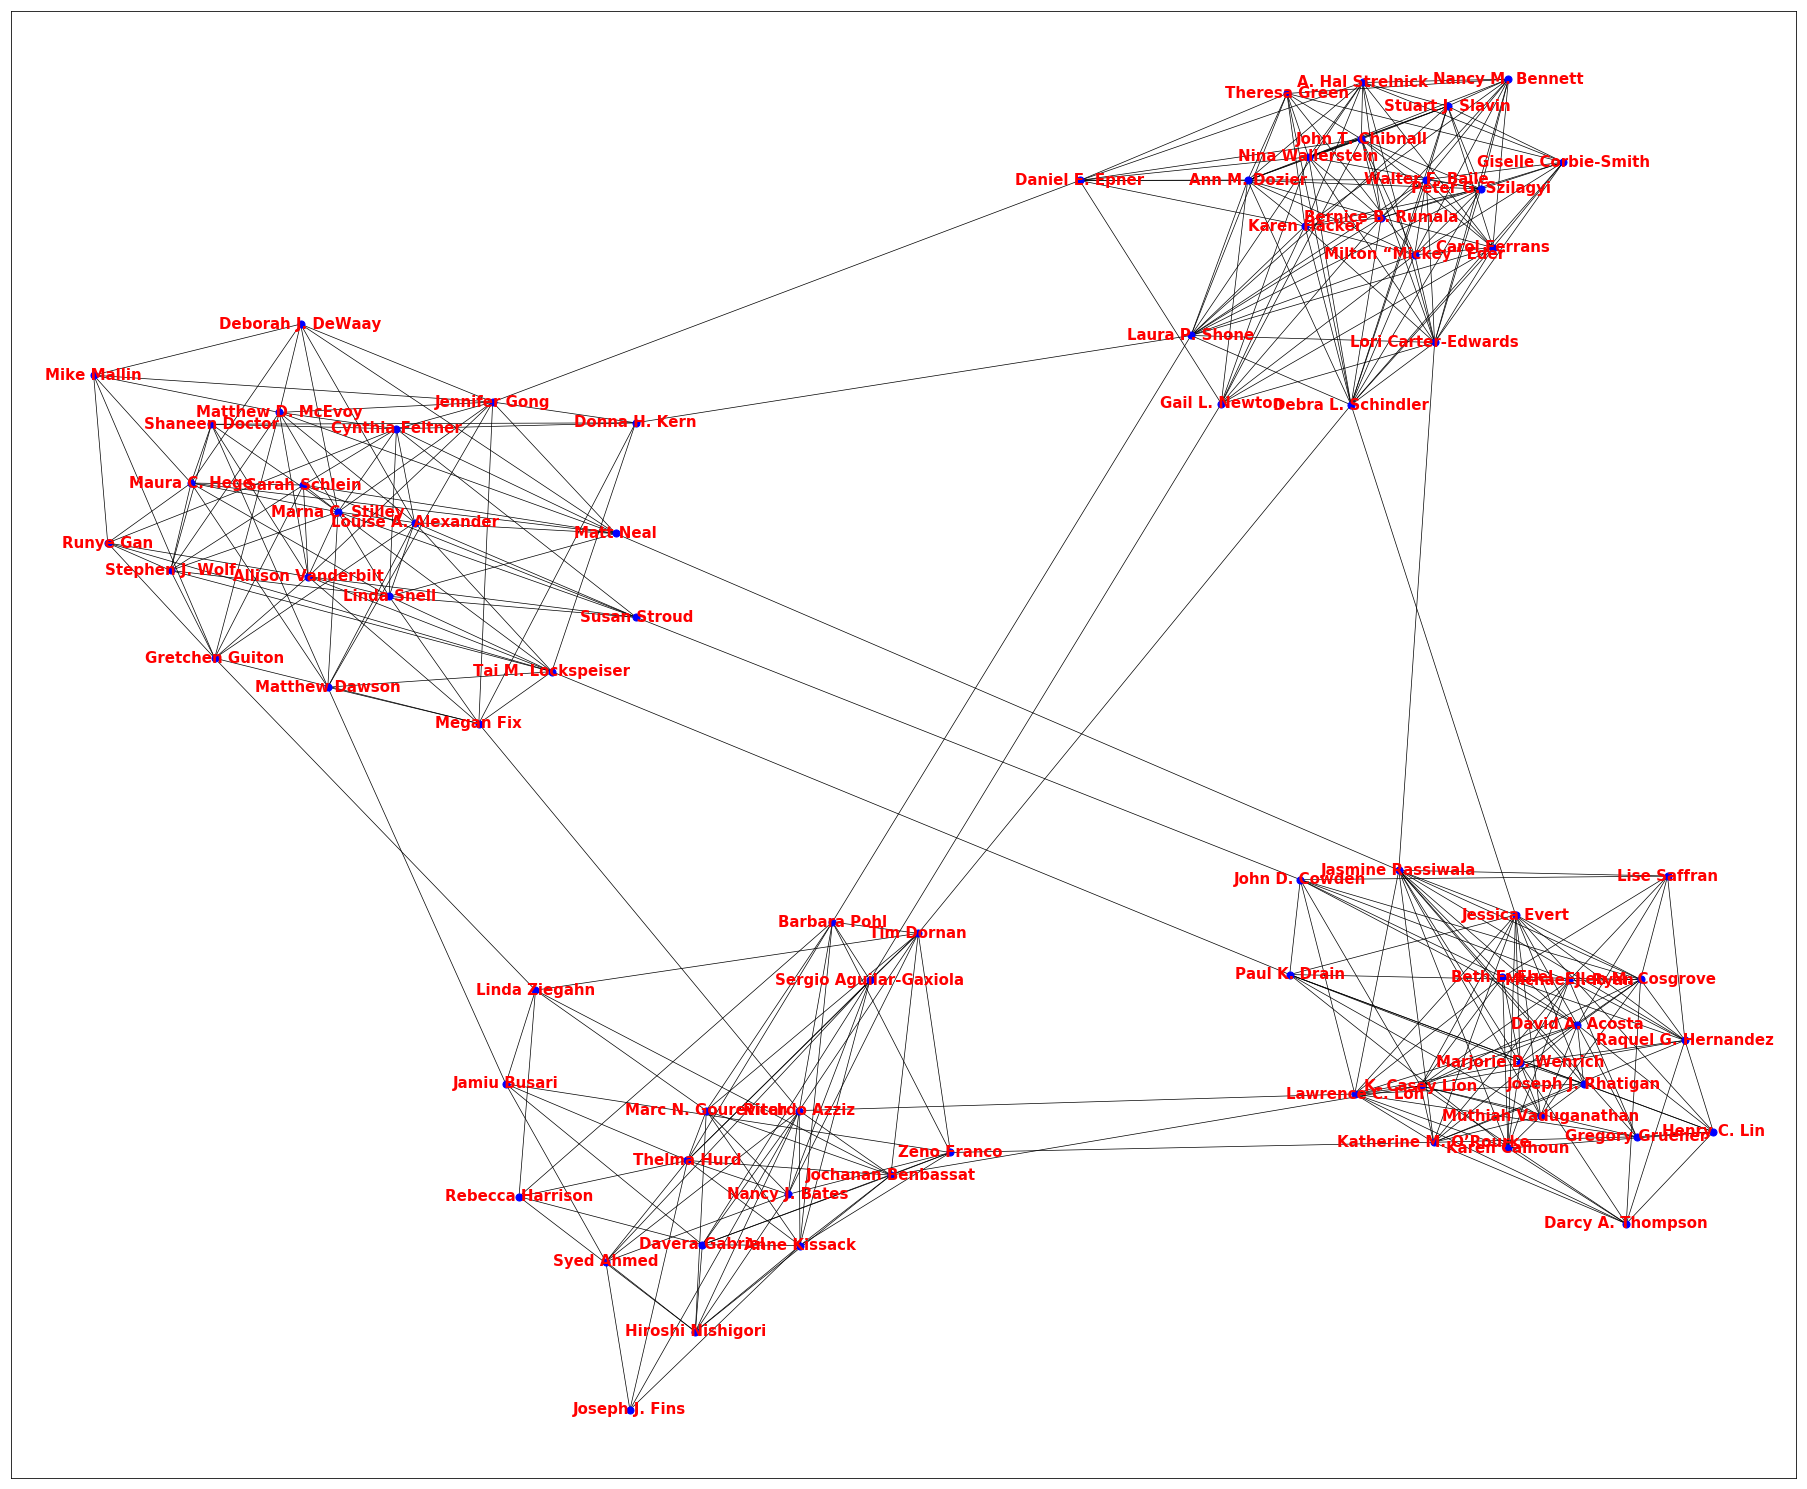

In [23]:
#printing graph with new communities found by modularity
matplotlib.rcParams['figure.figsize'] = [32,27]
G_comm = B(V1, C1, M1, pc, e=0.01)


nx.draw_networkx(G_comm, 
                 node_size=50, width=0.7,node_color ='b', font_weight='bold',
                 font_color='r', font_size=15)

plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
plt.show()

In [24]:
#adjacency matrix of original graph
A = nx.adjacency_matrix(G_new)

In [25]:
#printing the sparse matrix
print(A.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


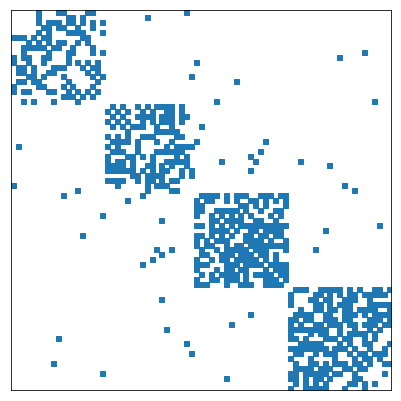

In [26]:
#printing adjacency matrix of orginal graph
matplotlib.rcParams['figure.figsize'] = [12,7]
plt.spy(A, markersize=5)
plt.xticks(range(len(G.nodes())), G.nodes())
plt.yticks(range(len(G.nodes())), G.nodes())
plt.show()

In [27]:
#adjacency matrix of new graph aligned according to communites found by modularity
Acom = nx.adjacency_matrix(G_comm)

In [28]:
#printing the sparse matrix
print(Acom.todense())

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


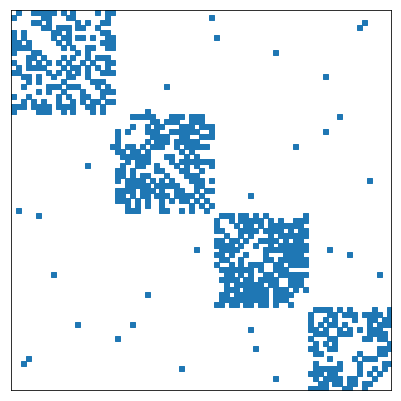

In [29]:
#printing the adjacency matrix of new graph
matplotlib.rcParams['figure.figsize'] = [12,7]
plt.spy(Acom, markersize=5)
plt.xticks(range(len(G.nodes())), G.nodes())
plt.yticks(range(len(G.nodes())), G.nodes())
plt.show()